Objective :-  
1. classify / predict whether a patient is prone to heart failure depending on multiple attributes.
2. It is a binary classification with multiple numerical and categorical features.

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
heart = pd.read_csv('heartAttack.csv')
heart.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Data Preparation

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: >

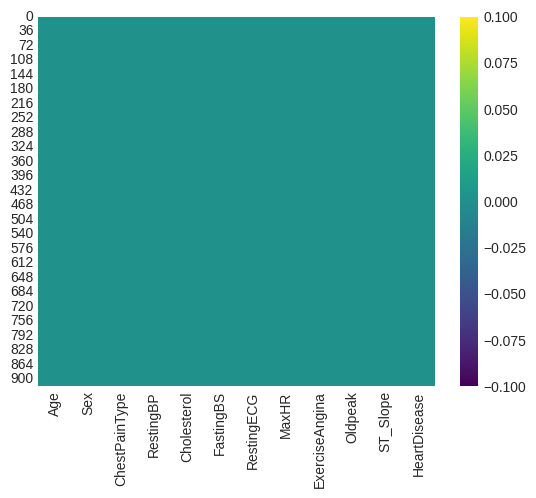

In [ ]:

sns.heatmap(heart.isnull(), cmap='viridis')

**No null values** present in the data!

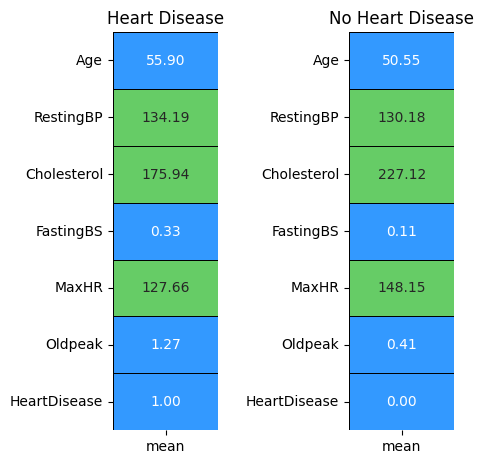

In [ ]:
yes = heart[heart['HeartDisease'] == 1].describe().T
no = heart[heart['HeartDisease'] == 0].describe().T
colors = ['#3399FF', '#66CC66']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

Mean values of all features for cases with and without heart diseases. This helps us in :-

1. **Comparison of Average Values:** By comparing the mean values of features between the two groups (heart disease present vs. heart disease absent), we can identify potential differences or similarities in feature distributions. This can provide insights into which features might be more strongly associated with the presence or absence of heart disease.

2. **Identification of Patterns:** We can identify patterns or trends in the data based on the average values of features. For example, if certain features consistently have higher or lower mean values in the group with heart disease compared to the group without heart disease, it may indicate the importance of those features in predicting or understanding heart disease.

3. **Feature Importance:** Features with significant differences in mean values between the two groups may be considered important predictors of heart disease. These features could be further investigated to understand their role in the occurrence or development of heart disease.

4. **Risk Assessment:** Mean values can provide a summary measure of the central tendency of features within each group, which can be useful for risk assessment or stratification. Features with higher mean values in the group with heart disease may indicate higher risk factors associated with the disease.

### Exploratory Data Analysis

In [ ]:
categorical_features = heart.select_dtypes(include=['object']).columns
numerical_features = heart.select_dtypes(exclude=['object']).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Numerical Features: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = heart.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [ ]:
df1.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

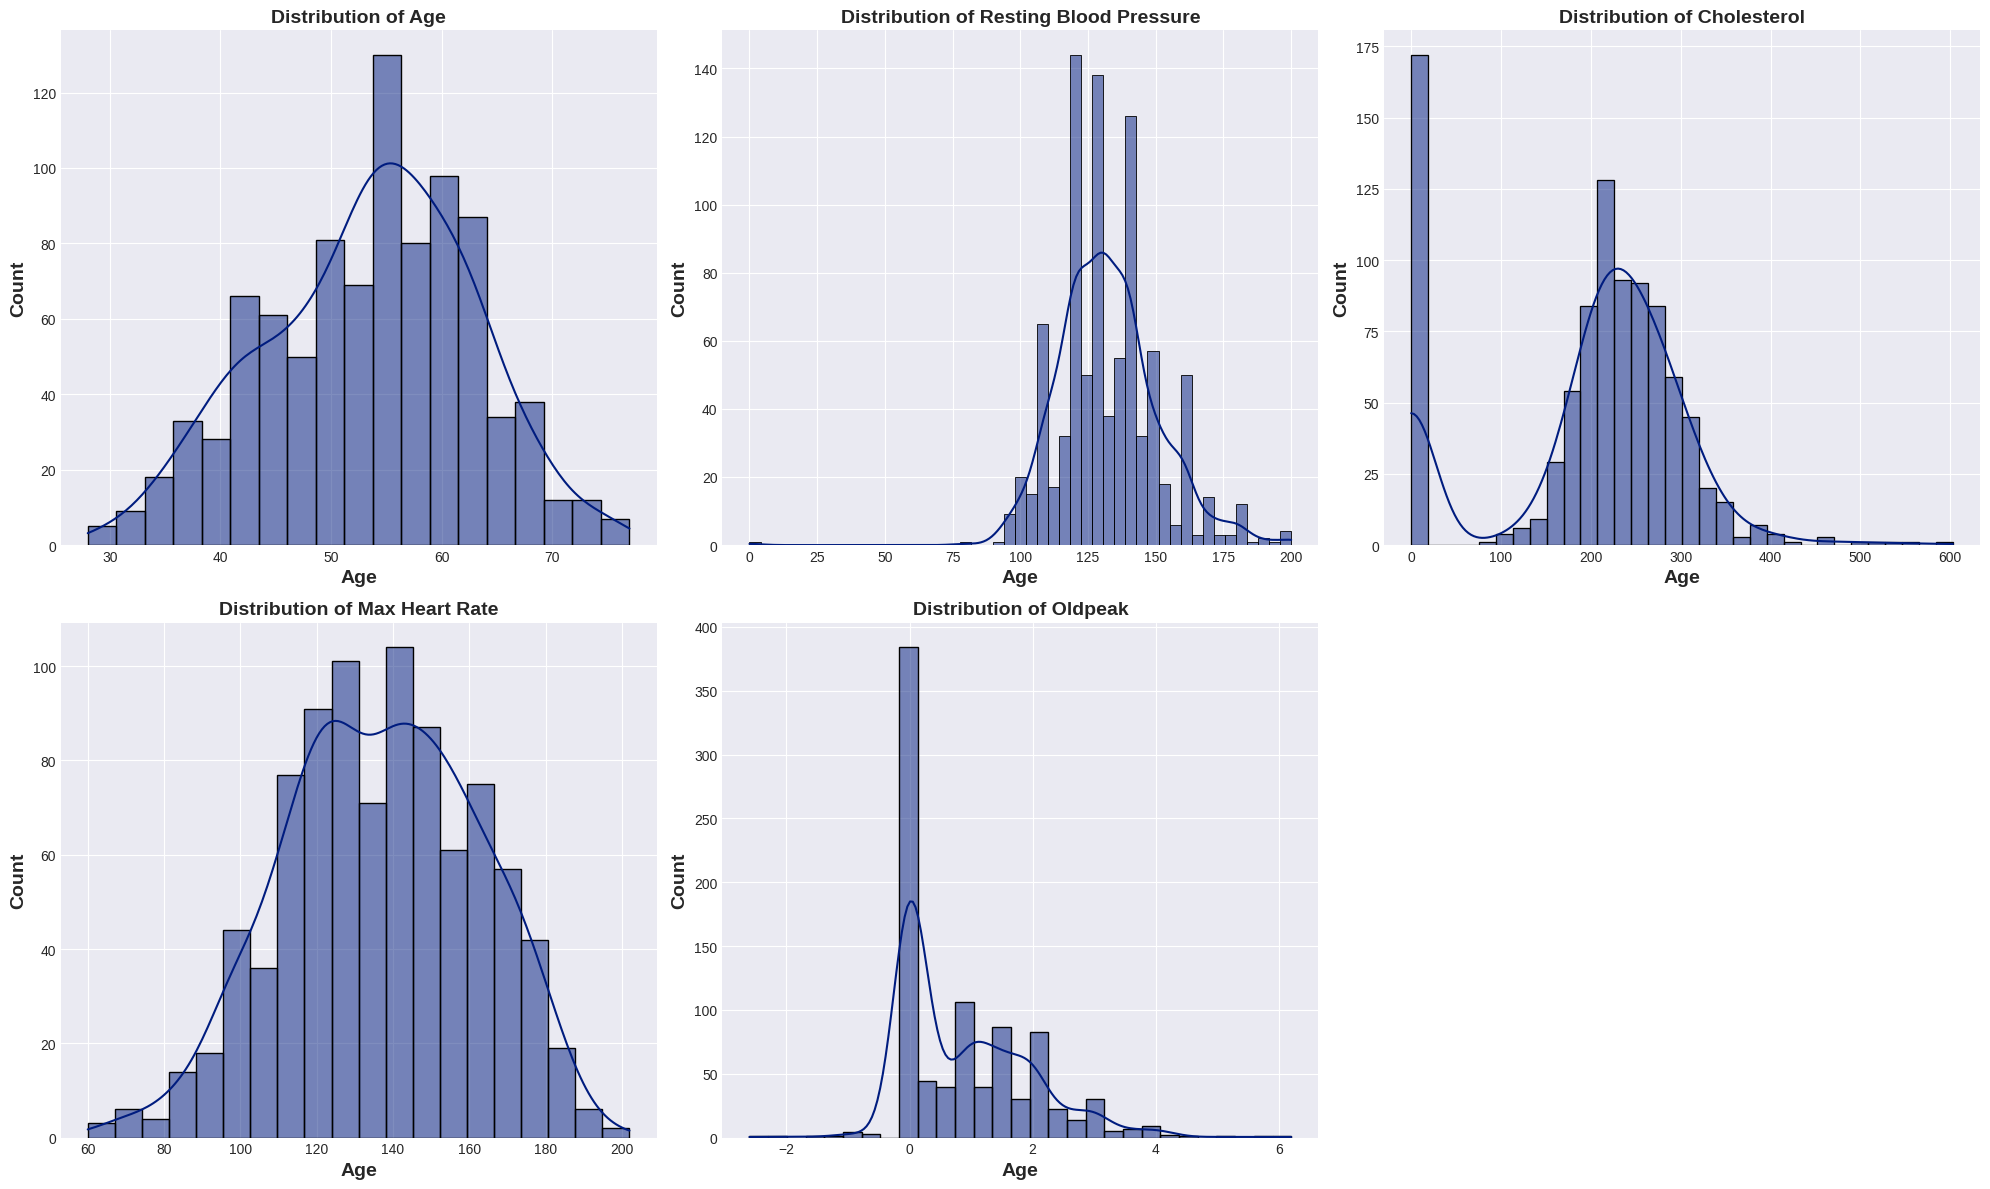

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.set_palette("muted")
# First row for Age, RestingBP, and Cholesterol
plt.subplot(2, 3, 1)  # (rows, columns, index)
sns.histplot(heart['Age'], kde=True)
plt.title('Distribution of Age', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

plt.subplot(2, 3, 2)
sns.histplot(heart['RestingBP'], kde=True)
plt.title('Distribution of Resting Blood Pressure', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

plt.subplot(2, 3, 3)
sns.histplot(heart['Cholesterol'], kde=True)
plt.title('Distribution of Cholesterol', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

# Second row for Max Heart Rate and Oldpeak
plt.subplot(2, 3, 4)
sns.histplot(heart['MaxHR'], kde=True)
plt.title('Distribution of Max Heart Rate', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

plt.subplot(2, 3, 5)
sns.histplot(heart['Oldpeak'], kde=True)
plt.title('Distribution of Oldpeak', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Count of Heart Disease Cases')

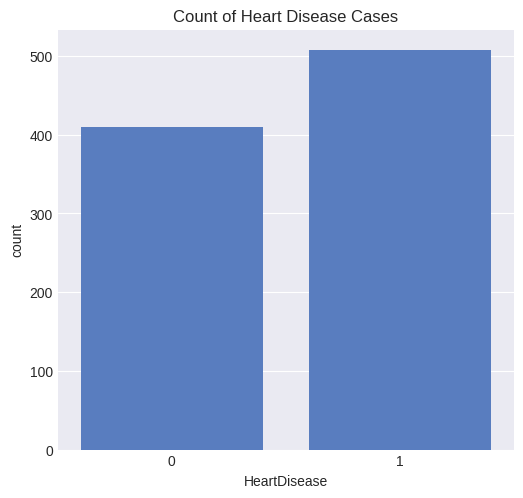

In [ ]:
plt.figure(figsize=(20, 12))
# Bar plot for Heart Disease occurrences
plt.subplot(2, 3, 5)
sns.countplot(x='HeartDisease', data=df1)
plt.title('Count of Heart Disease Cases')

In [ ]:
# find the unique values
heart['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

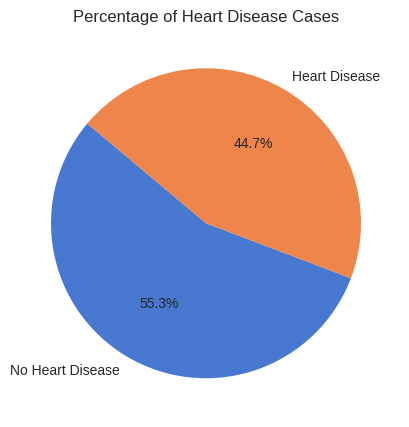

In [ ]:
heart_disease_counts = heart['HeartDisease'].value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(5, 6))
plt.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Heart Disease Cases')
plt.show()


The dataset is pretty much evenly balanced!

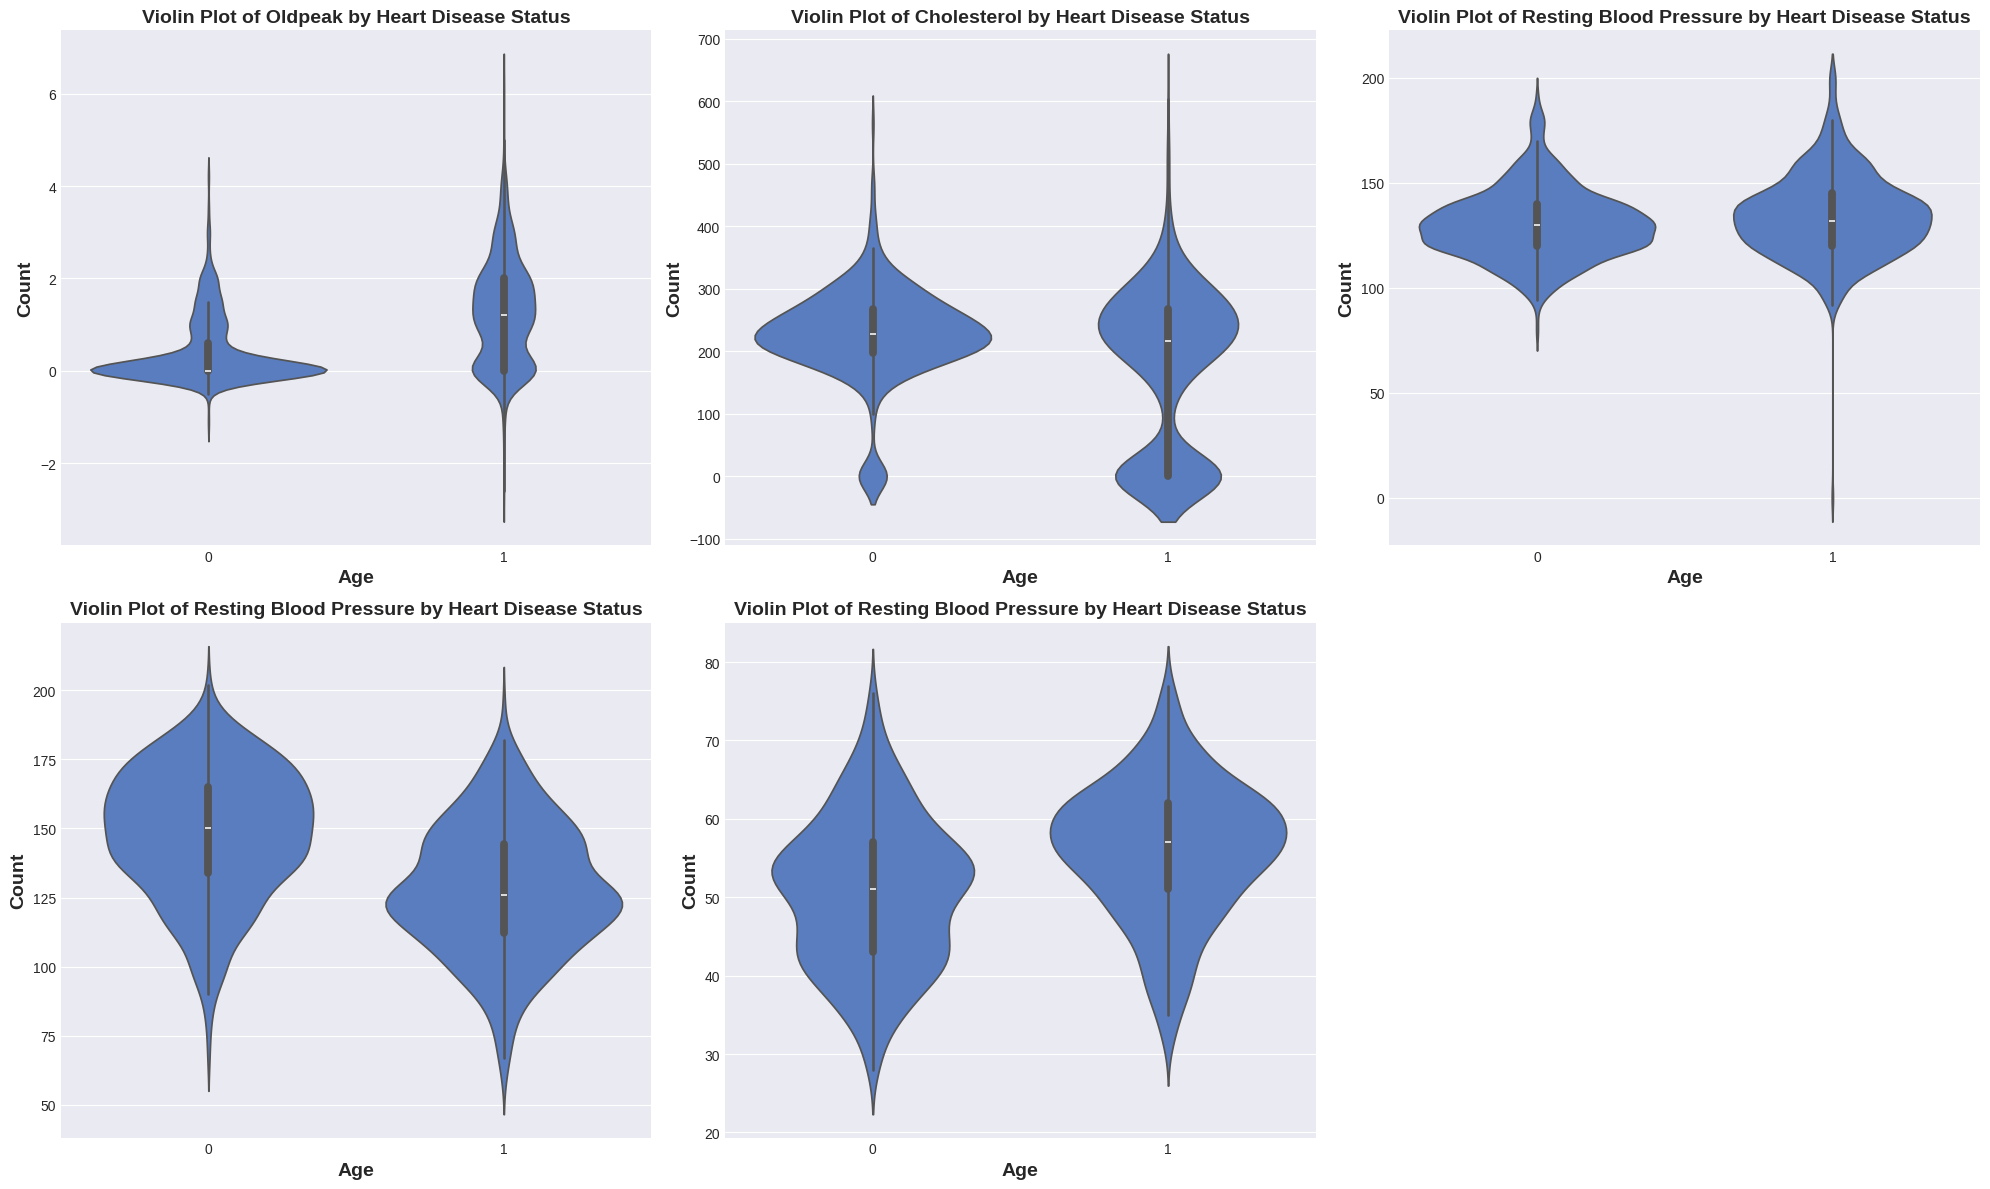

In [ ]:
# Create a figure to hold the subplots
plt.figure(figsize=(20, 12))
sns.set_palette("muted")
# Violin plot for 'Oldpeak'
plt.subplot(2, 3, 1)
sns.violinplot(x='HeartDisease', y='Oldpeak', data=heart)
plt.title('Violin Plot of Oldpeak by Heart Disease Status', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

# Violin plot for 'Cholesterol'
plt.subplot(2, 3, 2)
sns.violinplot(x='HeartDisease', y='Cholesterol', data=heart)
plt.title('Violin Plot of Cholesterol by Heart Disease Status', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

# Violin plot for 'RestingBP'
plt.subplot(2, 3, 3)
sns.violinplot(x='HeartDisease', y='RestingBP', data=heart)
plt.title('Violin Plot of Resting Blood Pressure by Heart Disease Status', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

# Violin plot for 'MaxHR'
plt.subplot(2, 3, 4)
sns.violinplot(x='HeartDisease', y='MaxHR', data=heart)
plt.title('Violin Plot of Resting Blood Pressure by Heart Disease Status', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

# Violin plot for 'Age'
plt.subplot(2, 3, 5)
sns.violinplot(x='HeartDisease', y='Age', data=heart)
plt.title('Violin Plot of Resting Blood Pressure by Heart Disease Status', fontsize=14, weight="bold")
plt.xlabel('Age', fontsize=14, weight="bold")
plt.ylabel('Count', fontsize=14, weight="bold")

plt.tight_layout()
plt.show()

<ipython-input-111-45530ec3b8c2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


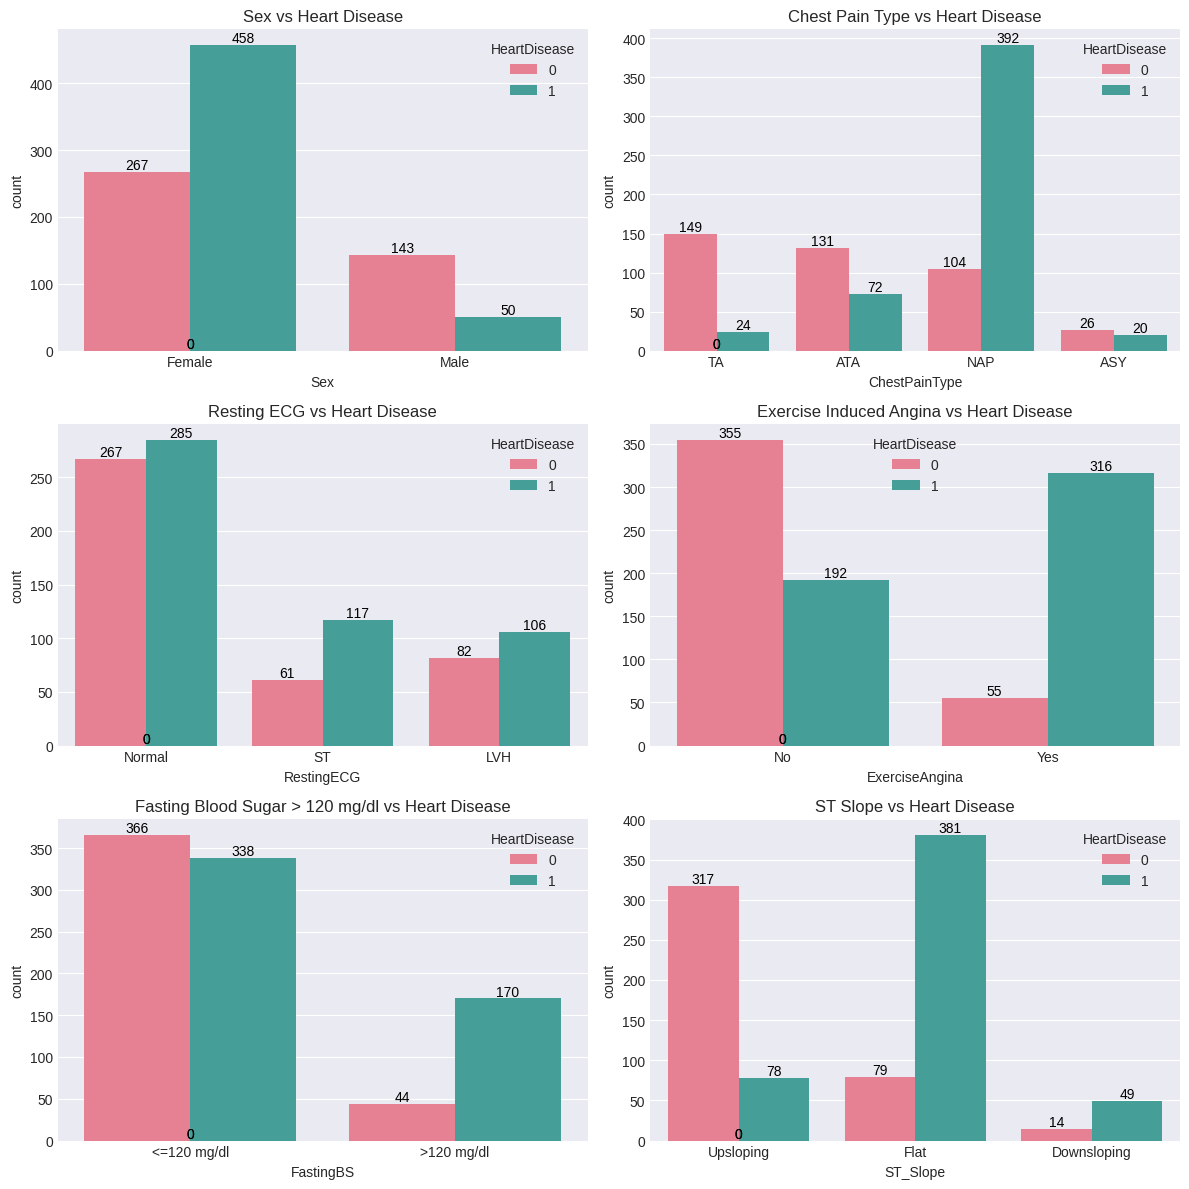

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
plt.style.use('seaborn-darkgrid')

# Use a consistent color palette
sns.set_palette("muted")

# Set the figure size
plt.figure(figsize=(12, 12))

# Helper function to add labels on the bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Plotting 'Sex' vs 'HeartDisease'
ax1 = plt.subplot(3, 2, 1)
plot1 = sns.countplot(x='Sex', hue='HeartDisease', data=heart, palette=palette, ax=ax1)
plt.title('Sex vs Heart Disease')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
add_labels(ax1)

# Plotting 'ChestPainType' vs 'HeartDisease'
ax2 = plt.subplot(3, 2, 2)
plot2 = sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart, palette=palette, ax=ax2)
plt.title('Chest Pain Type vs Heart Disease')
plt.xticks(ticks=[0, 1, 2, 3], labels=['TA', 'ATA', 'NAP', 'ASY'])
add_labels(ax2)

# Plotting 'RestingECG' vs 'HeartDisease'
ax3 = plt.subplot(3, 2, 3)
plot3 = sns.countplot(x='RestingECG', hue='HeartDisease', data=heart, palette=palette, ax=ax3)
plt.title('Resting ECG vs Heart Disease')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'ST', 'LVH'])
add_labels(ax3)

# Plotting 'ExerciseAngina' vs 'HeartDisease'
ax4 = plt.subplot(3, 2, 4)
plot4 = sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=heart, palette=palette, ax=ax4)
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
add_labels(ax4)

# Plotting 'FastingBS' vs 'HeartDisease'
ax5 = plt.subplot(3, 2, 5)
plot5 = sns.countplot(x='FastingBS', hue='HeartDisease', data=heart, palette=palette, ax=ax5)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Heart Disease')
plt.xticks(ticks=[0, 1], labels=['<=120 mg/dl', '>120 mg/dl'])
add_labels(ax5)

# Plotting 'ST_Slope' vs 'HeartDisease'
ax6 = plt.subplot(3, 2, 6)
plot6 = sns.countplot(x='ST_Slope', hue='HeartDisease', data=heart, palette=palette, ax=ax6)
plt.title('ST Slope vs Heart Disease')
plt.xticks(ticks=[0, 1, 2], labels=['Upsloping', 'Flat', 'Downsloping'])
add_labels(ax6)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.

ASY type of chest pain boldly points towards major chances of heart disease.
Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.

Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.

With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.

ASY type of chest pain boldly points towards major chances of heart disease.
Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.

Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.

With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.

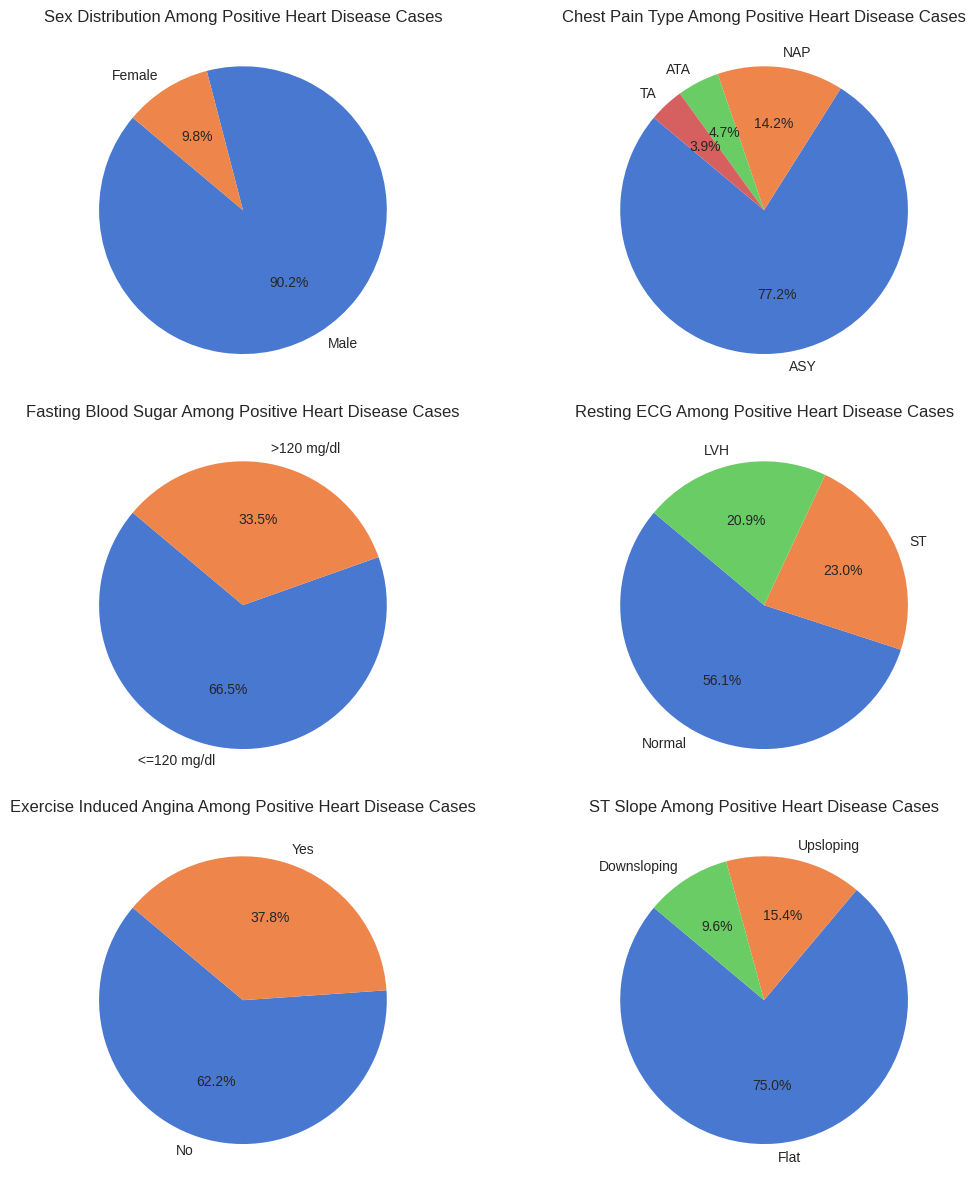

In [ ]:
# Filtering the dataset for positive heart disease cases
df_hd_positive = heart[heart['HeartDisease'] == 1]

# Creating pie charts for each categorical feature
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Sex Distribution
sex_counts = df_hd_positive['Sex'].value_counts()
axs[0, 0].pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Sex Distribution Among Positive Heart Disease Cases')

# Chest Pain Type Distribution
chest_pain_counts = df_hd_positive['ChestPainType'].value_counts()
axs[0, 1].pie(chest_pain_counts, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Chest Pain Type Among Positive Heart Disease Cases')

# FastingBS Distribution
fasting_bs_counts = df_hd_positive['FastingBS'].value_counts()
axs[1, 0].pie(fasting_bs_counts, labels=['<=120 mg/dl', '>120 mg/dl'], autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Fasting Blood Sugar Among Positive Heart Disease Cases')

# Resting ECG Distribution
resting_ecg_counts = df_hd_positive['RestingECG'].value_counts()
axs[1, 1].pie(resting_ecg_counts, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Resting ECG Among Positive Heart Disease Cases')

# Exercise Angina Distribution
exercise_angina_counts = df_hd_positive['ExerciseAngina'].value_counts()
axs[2, 0].pie(exercise_angina_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140)
axs[2, 0].set_title('Exercise Induced Angina Among Positive Heart Disease Cases')

# ST Slope Distribution
st_slope_counts = df_hd_positive['ST_Slope'].value_counts()
axs[2, 1].pie(st_slope_counts, labels=['Flat', 'Upsloping', 'Downsloping'], autopct='%1.1f%%', startangle=140)
axs[2, 1].set_title('ST Slope Among Positive Heart Disease Cases')

plt.tight_layout()
plt.show()


Here are the pie charts visualizing various categorical features among positive heart disease cases:

Sex Distribution: Shows the proportion of male and female patients who have heart disease.

Chest Pain Type: Indicates the types of chest pain prevalent among heart disease patients, labeled as ASY (Asymptomatic), NAP (Non-Anginal Pain), ATA (Atypical Angina), and TA (Typical Angina).

Fasting Blood Sugar: Compares the percentage of patients with fasting blood sugar levels <=120 mg/dl and >120 mg/dl among those with heart disease.

Resting ECG: Shows the distribution of resting ECG results among heart disease patients, categorized as Normal, ST, and LVH (Left Ventricular Hypertrophy).
Exercise Induced Angina: Highlights the occurrence of exercise-induced angina in heart disease patients.

ST Slope: Details the distribution of ST slope results (Flat, Upsloping, Downsloping) among these patients.

These pie charts provide a clear visual summary of the distribution of each categorical feature among patients diagnosed with heart disease, helping to identify which characteristics are most common in this group.

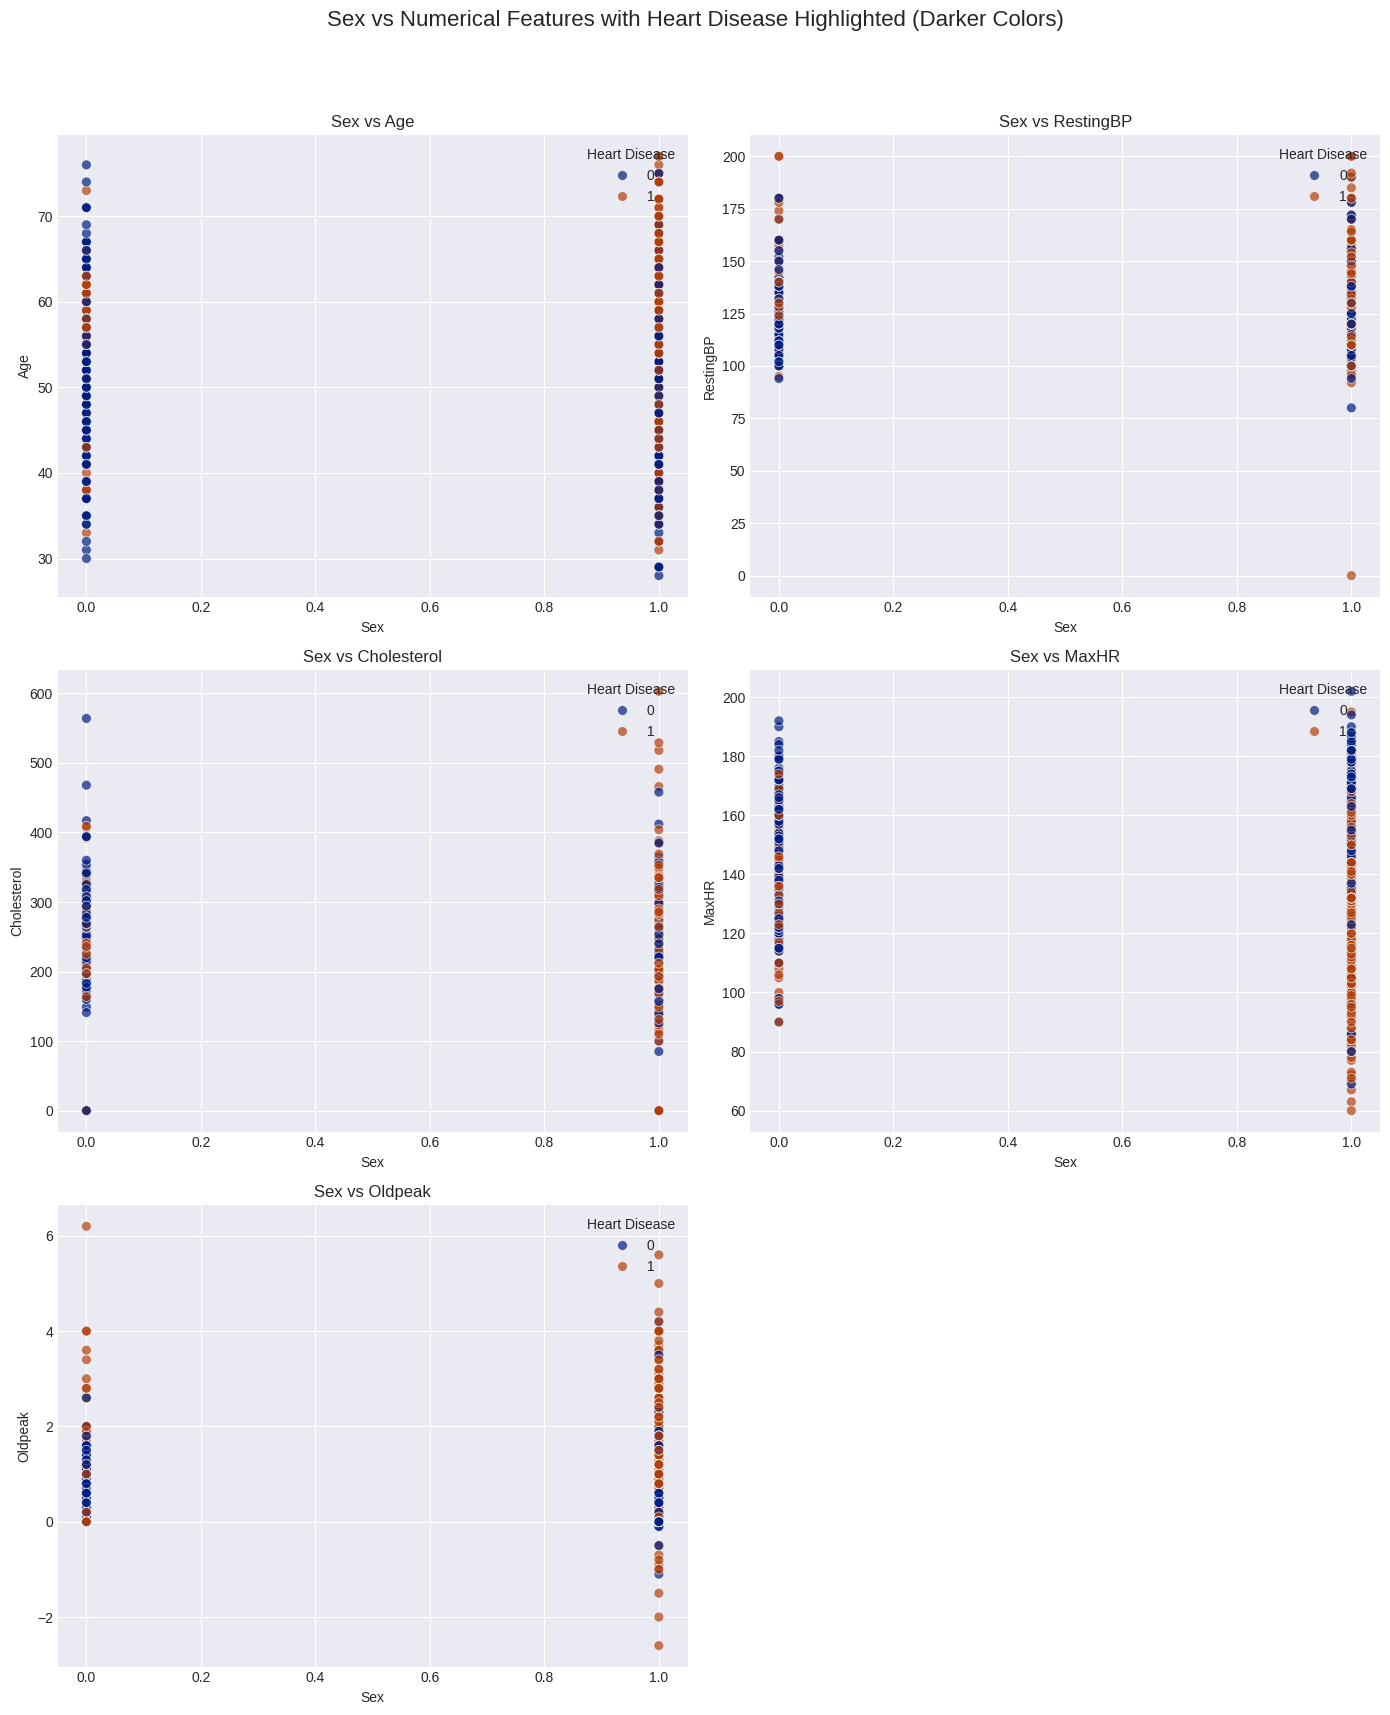

In [ ]:
# Setting up the figure for multiple scatter plots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Sex vs Numerical Features with Heart Disease Highlighted (Darker Colors)', fontsize=16)

# Function to plot scatter plots with adjustments
def plot_scatter_dark(feature, ax):
    sns.scatterplot(ax=ax, data=df1, x='Sex', y=feature, hue='HeartDisease', palette='dark', alpha=0.7, s=50)
    ax.set_title(f'Sex vs {feature}')
    ax.set_ylabel(f'{feature}')
    ax.set_xlabel('Sex')
    ax.legend(title='Heart Disease', loc='upper right')

# Plotting each feature
plot_scatter_dark('Age', axes[0, 0])
plot_scatter_dark('RestingBP', axes[0, 1])
plot_scatter_dark('Cholesterol', axes[1, 0])
plot_scatter_dark('MaxHR', axes[1, 1])
plot_scatter_dark('Oldpeak', axes[2, 0])

# Hide empty subplot
axes[2, 1].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The scatter plots show the relationship between "Sex" and various numerical features, with heart disease presence highlighted:


Age vs Sex: You can see a distribution across age, with heart disease present in both males and females across various ages, though with higher incidences in older age groups.

RestingBP vs Sex: This plot shows variations in resting blood pressure across sexes, with heart disease appearing in individuals with both high and normal blood pressure levels.

Cholesterol vs Sex: The spread of cholesterol levels shows heart disease across a wide range of values, more so at higher cholesterol levels, affecting both sexes.

MaxHR vs Sex: Maximum heart rate varies, with lower rates often associated with heart disease in this visual.

Oldpeak vs Sex: Higher values of ST depression (Oldpeak) are more frequently associated with heart disease.

These visuals highlight how each numerical factor interacts with the categorical variable "Sex" in the context of heart disease, suggesting potential areas of focus for further analysis or preventive measures.

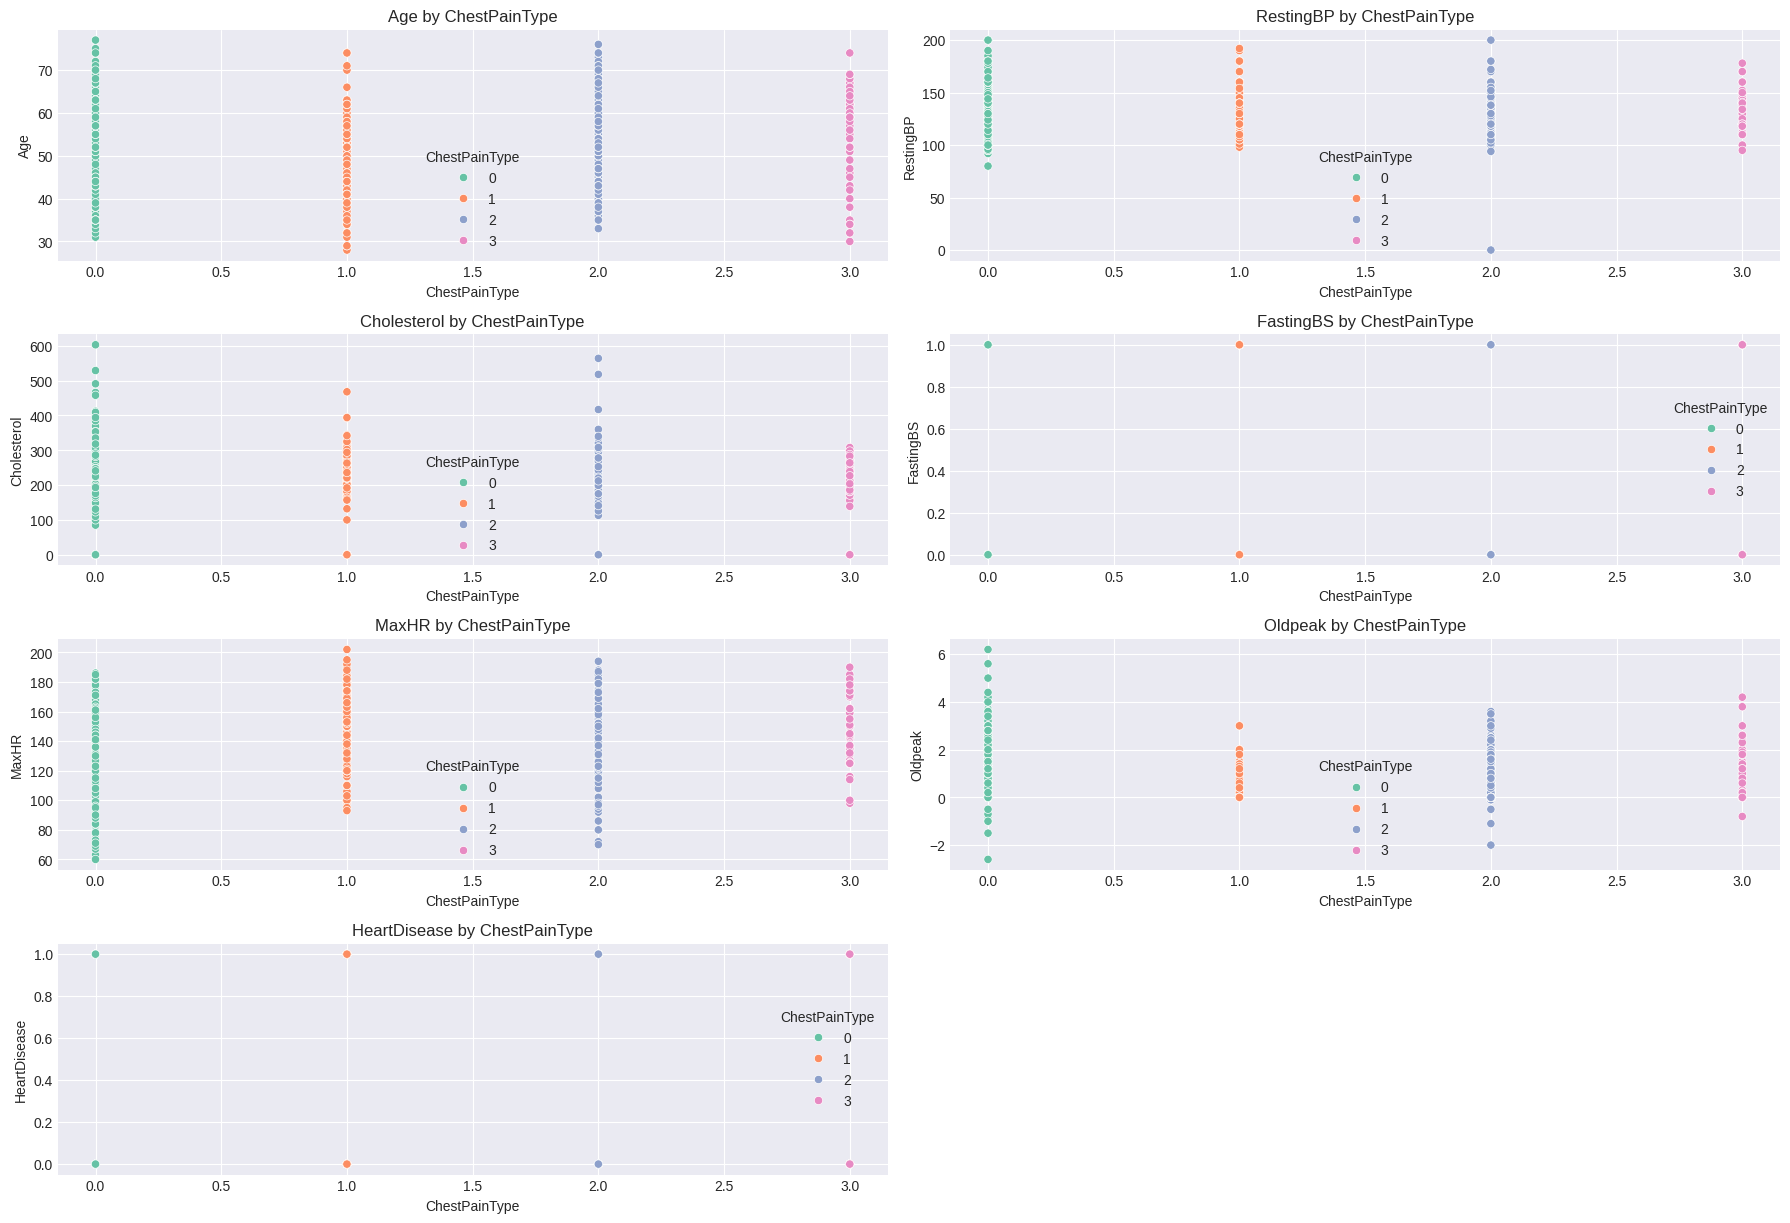

In [ ]:
# Re-plotting scatter plots with ChestPainType on the x-axis and numerical features on the y-axis
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x="ChestPainType", y=feature, hue="ChestPainType", data=df1, palette="Set2")
    plt.title(f'{feature} by ChestPainType')

plt.tight_layout()
plt.show()


Here are the scatter plots for each numerical feature, grouped by ChestPainType. These plots allow us to visually inspect the distribution of numerical features across different types of chest pain, potentially highlighting differences or patterns:

Age: There appears to be a range of ages across all types of chest pain, with no clear age-specific trends for any particular type.

RestingBP: Variability in resting blood pressure seems quite broad across all chest pain types.

Cholesterol: Cholesterol levels also show a wide distribution without specific clustering by chest pain type.

MaxHR (Maximum Heart Rate): Maximum heart rate varies widely across chest pain types, but there's no immediate indication of distinct patterns.

Oldpeak: There seems to be a spread in Oldpeak values across different chest pain types, possibly with slightly higher values more frequent in some types.

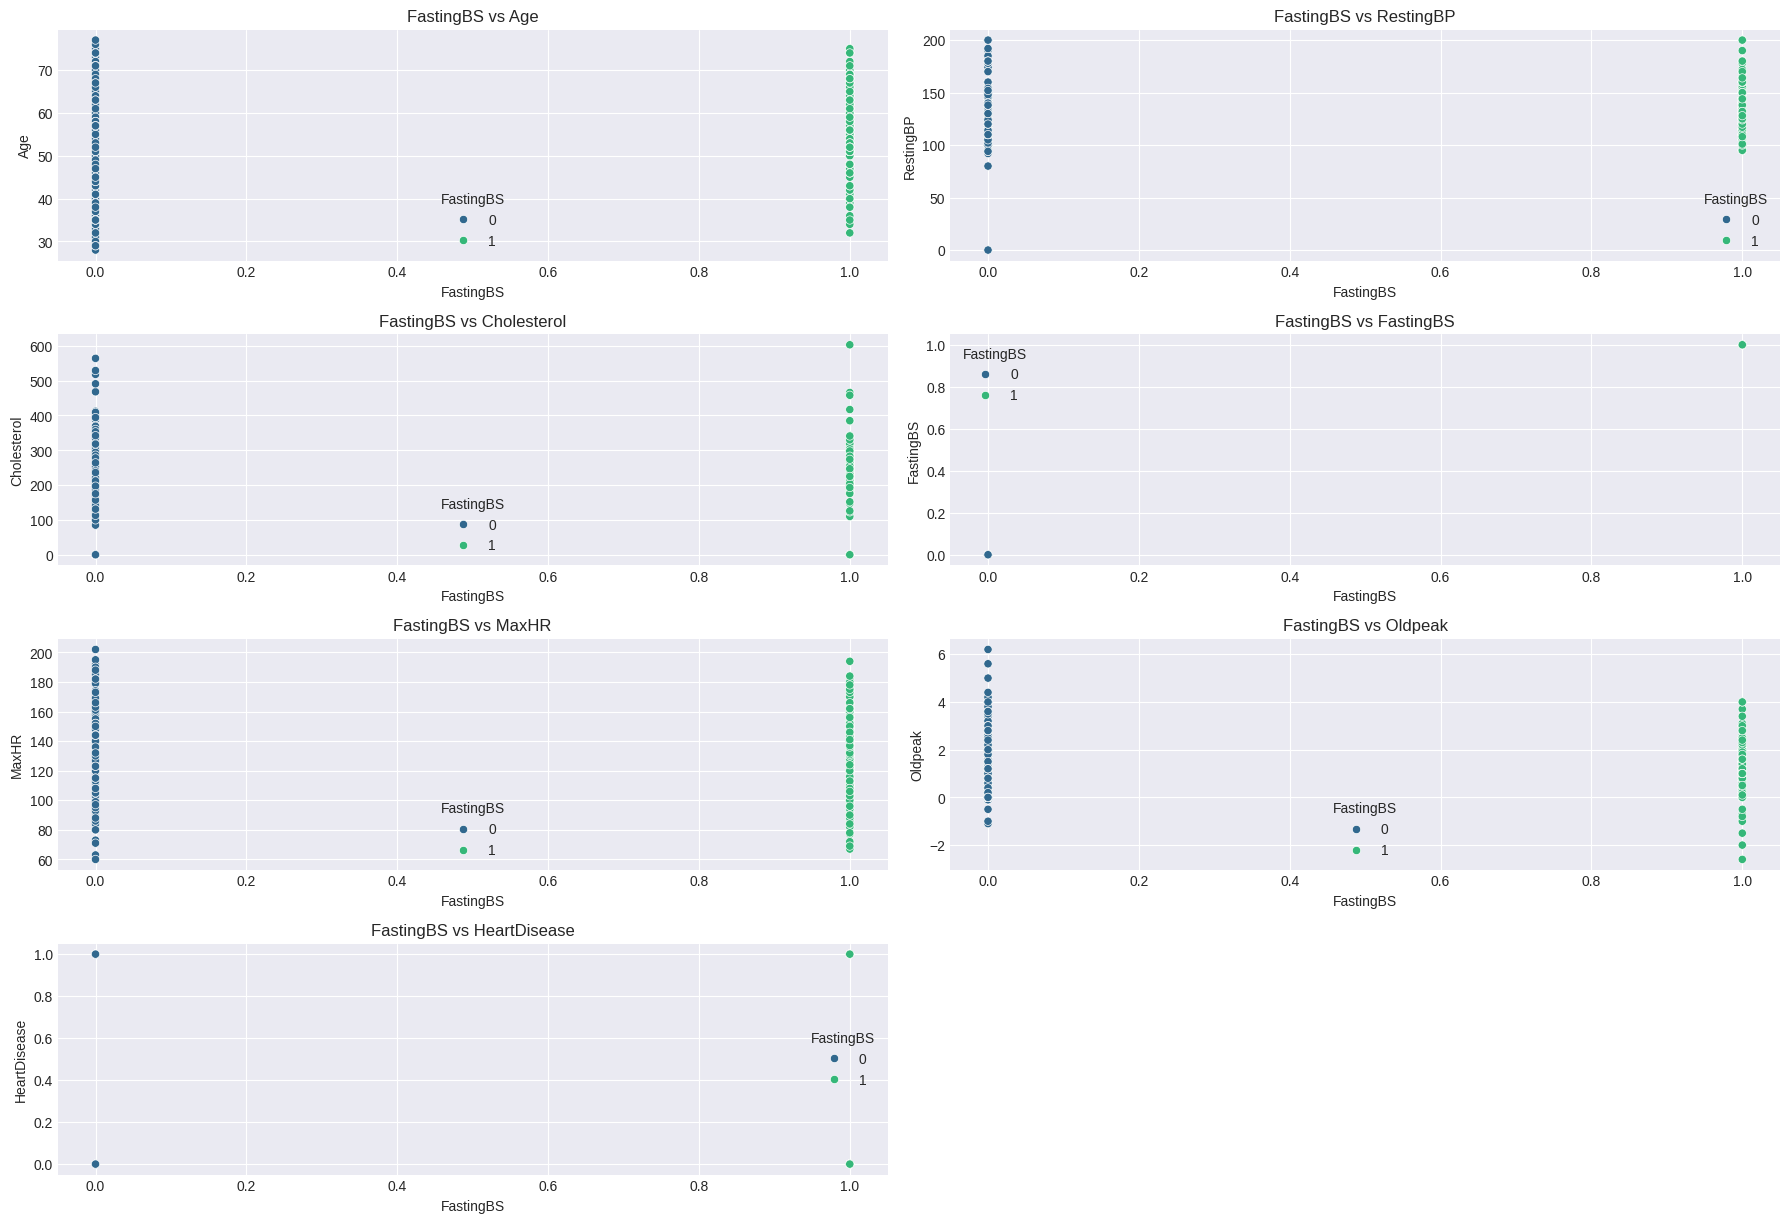

In [ ]:
# Re-plotting scatter plots with FastingBS on the x-axis and numerical features on the y-axis
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x="FastingBS", y=feature, hue="FastingBS", data=df1, palette="viridis")
    plt.title(f'FastingBS vs {feature}')

plt.tight_layout()
plt.show()


Here are the scatter plots for each numerical feature, with FastingBS (Fasting Blood Sugar) on the x-axis. These plots help visualize how the distributions of these features differ between patients with normal fasting blood sugar (0) and those with high fasting blood sugar (1).

Age: The age distribution seems similar across both groups.
RestingBP: Resting blood pressure distributions also look similar across both fasting blood sugar categories.
Cholesterol: Cholesterol levels do not show a clear differentiation based on fasting blood sugar status.
MaxHR (Maximum Heart Rate): The maximum heart rate appears fairly consistent across both categories, without a clear trend.
Oldpeak: ST depression values show some spread, but no distinct pattern emerges between the two groups.Here are the scatter plots for each numerical feature, with FastingBS (Fasting Blood Sugar) on the x-axis. These plots help visualize how the distributions of these features differ between patients with normal fasting blood sugar (0) and those with high fasting blood sugar (1).

Age: The age distribution seems similar across both groups.
RestingBP: Resting blood pressure distributions also look similar across both fasting blood sugar categories.
Cholesterol: Cholesterol levels do not show a clear differentiation based on fasting blood sugar status.
MaxHR (Maximum Heart Rate): The maximum heart rate appears fairly consistent across both categories, without a clear trend.
Oldpeak: ST depression values show some spread, but no distinct pattern emerges between the two groups.

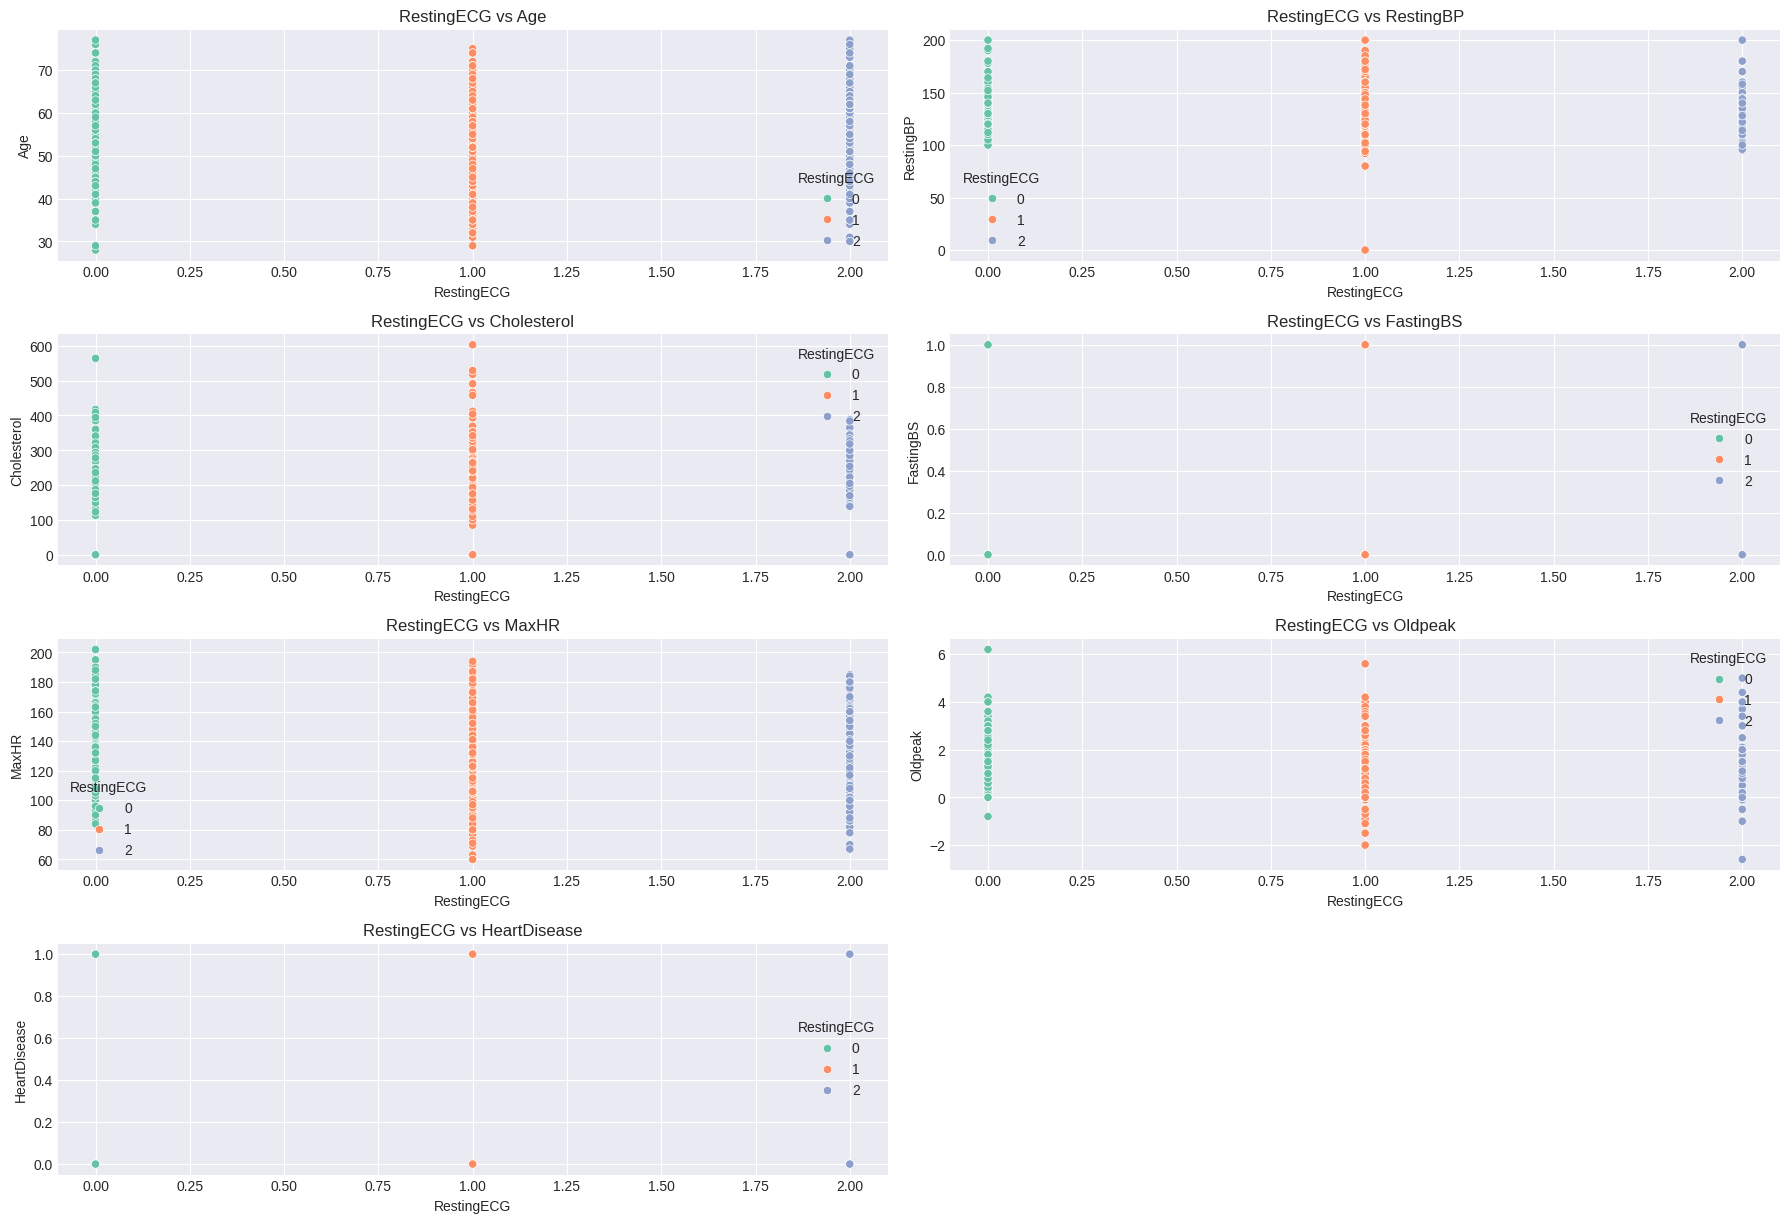

In [ ]:
# Creating scatter plots with RestingECG on the x-axis and numerical features on the y-axis
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x="RestingECG", y=feature, hue="RestingECG", data=df1, palette="Set2")
    plt.title(f'RestingECG vs {feature}')

plt.tight_layout()
plt.show()


Here are the scatter plots with RestingECG categories on the x-axis and each numerical feature on the y-axis. This visualization helps us understand how the values of these features are distributed among the different ECG categories in df1:

Age: Appears fairly uniform across different ECG categories, with no clear trends.

RestingBP: Similar blood pressure levels across categories, though some outliers are visible.
Cholesterol: Cholesterol levels are dispersed across the categories with no evident grouping.
MaxHR (Maximum Heart Rate): Max heart rate varies across categories but does not show a distinct pattern.
Oldpeak: Values of ST depression seem varied; some categories might show a concentration of higher or lower values.

# Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop(columns = "HeartDisease")
y = df1["HeartDisease"]

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y,
                                                      test_size = 0.2,
                                                      random_state = 0)


# Scaling the data for SVM, Naive Bayes, Neural network

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Normalizing the dataset

scale = StandardScaler()
X2 = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

print(X2.info())
print()
print(X2.head(24))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
dtypes: float64(11)
memory usage: 79.0 KB
None

         Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  -1.433140  0.515952       0.229032   0.410909     0.825070  -0.551341   
1  -0.478484 -1.938163       1.275059   1.491752    -0.171961  -0.551341   
2  -1.751359  0.515952       0.229

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X2, y,
                                                      test_size = 0.2,
                                                      random_state = 0)

print(train_X.info())
print()
print(train_y.info())
print()
print(valid_X.info())
print()
print(valid_y.info())

#use this for KNN, Naive Bayes, Neural nets

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 378 to 684
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    float64
 1   Sex             734 non-null    float64
 2   ChestPainType   734 non-null    float64
 3   RestingBP       734 non-null    float64
 4   Cholesterol     734 non-null    float64
 5   FastingBS       734 non-null    float64
 6   RestingECG      734 non-null    float64
 7   MaxHR           734 non-null    float64
 8   ExerciseAngina  734 non-null    float64
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    float64
dtypes: float64(11)
memory usage: 68.8 KB
None

<class 'pandas.core.series.Series'>
Index: 734 entries, 378 to 684
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
734 non-null    int64
dtypes: int64(1)
memory usage: 11.5 KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 306

# Models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.6 MB/s eta 0:00:00


In [ ]:
from dmba import classificationSummary
from dmba import plotDecisionTree

Colab environment detected.


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
lg = LogisticRegression()
lg.fit(train_X, train_y)

LogisticRegression()

In [ ]:
lpred = lg.predict(valid_X)
lgprob = lg.predict_proba(valid_X)
print(lpred)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1]


In [ ]:
probabilities = pd.DataFrame({'p(0)': [p[0] for p in lgprob],
                             'p(1)': [p[1] for p in lgprob]})
print(probabilities)

         p(0)      p(1)
0    0.086910  0.913090
1    0.320663  0.679337
2    0.051199  0.948801
3    0.117212  0.882788
4    0.817269  0.182731
..        ...       ...
179  0.391598  0.608402
180  0.057271  0.942729
181  0.820602  0.179398
182  0.869010  0.130990
183  0.043703  0.956297

[184 rows x 2 columns]


In [ ]:
lgresult = pd.DataFrame({'Actual': valid_y, 'Predicted': lpred})
print(lgresult.head(50))

     Actual  Predicted
306       1          1
711       0          1
298       1          1
466       1          1
253       0          0
230       0          0
906       0          0
14        0          0
202       0          0
31        0          0
532       1          1
420       0          1
408       1          1
631       1          1
145       0          0
441       1          1
521       1          1
390       1          1
247       1          1
812       0          0
249       1          1
236       1          1
338       1          1
523       1          1
285       0          0
65        0          0
142       1          1
671       1          1
566       0          1
252       0          0
478       1          1
150       0          0
97        0          0
658       0          0
447       1          1
77        0          0
817       1          1
726       0          0
372       1          1
830       0          0
55        0          0
214       1          1
175       1

In [ ]:
classificationSummary(train_y, lg.predict(train_X))

print()

classificationSummary(valid_y, lg.predict(valid_X))

Confusion Matrix (Accuracy 0.8583)

       Prediction
Actual   0   1
     0 281  52
     1  52 349

Confusion Matrix (Accuracy 0.8315)

       Prediction
Actual  0  1
     0 59 18
     1 13 94


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_y, lpred)
print(cm)

[[59 18]
 [13 94]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y,lpred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        77
           1       0.84      0.88      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



## Decision Tree

### Original

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
tpred = DT.predict(valid_X)

DF1 = pd.DataFrame({"Actual": valid_y, "Predicted": tpred})

print(DF1.head(20))

     Actual  Predicted
306       1          1
711       0          1
298       1          1
466       1          1
253       0          1
230       0          0
906       0          0
14        0          0
202       0          0
31        0          0
532       1          1
420       0          1
408       1          1
631       1          1
145       0          0
441       1          1
521       1          0
390       1          1
247       1          1
812       0          0


Confusion Matrix (Accuracy 0.7663)

       Prediction
Actual  0  1
     0 61 16
     1 27 80
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        77
           1       0.83      0.75      0.79       107

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.77      0.77      0.77       184



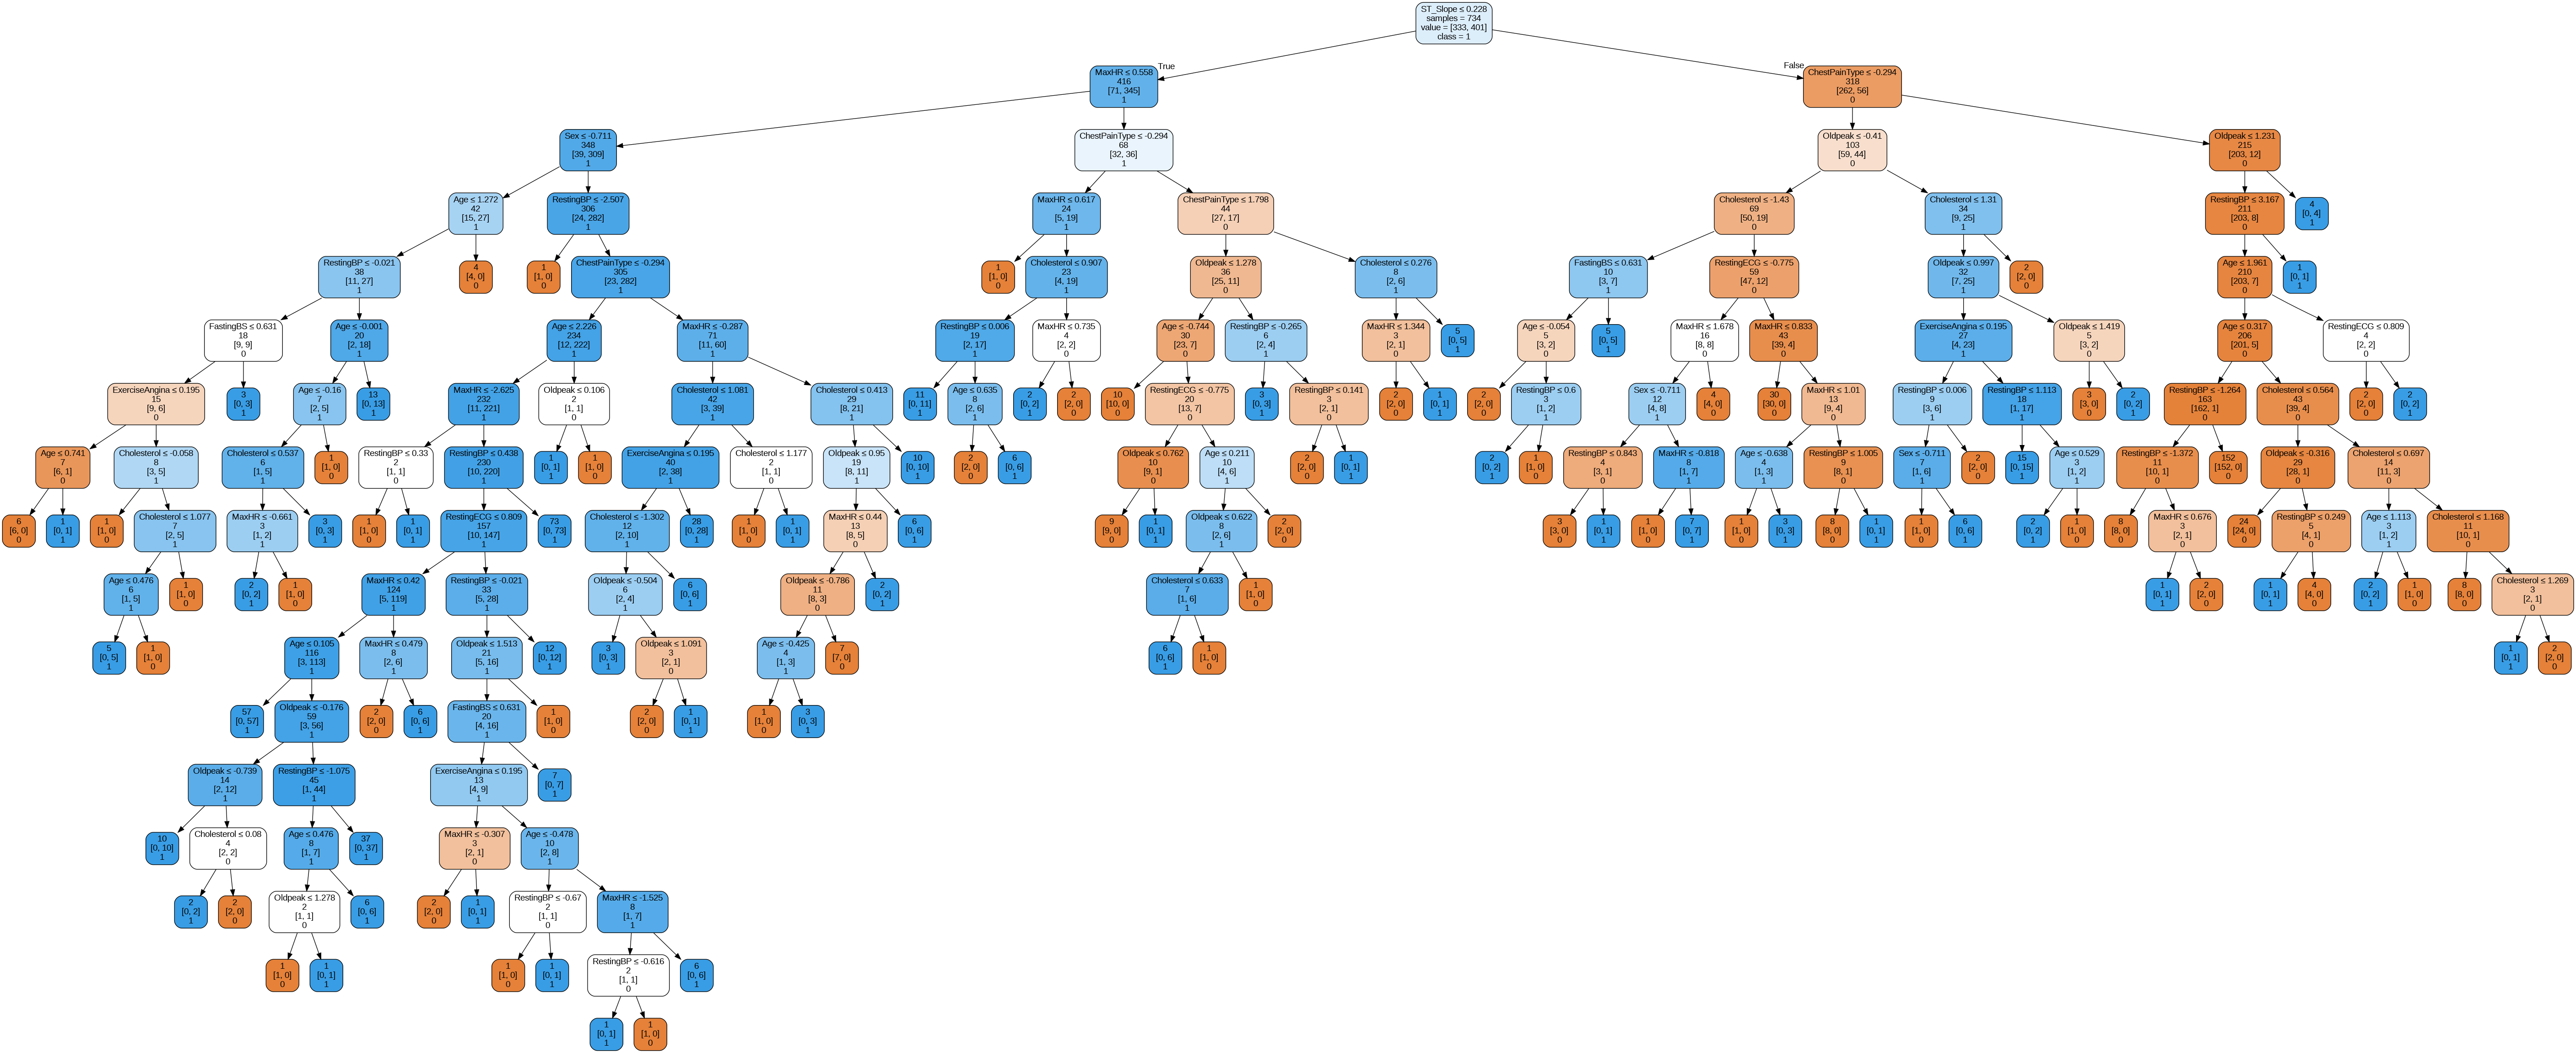

In [ ]:
classificationSummary(valid_y, tpred)

print(classification_report(valid_y, tpred))

plotDecisionTree(DT, feature_names = train_X.columns,
                 class_names = DT.classes_)

### Pruned- Original

In [ ]:
#Create a smaller tree:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth': [6,12,18],
          'min_samples_split': [20, 40, 60],
          'min_impurity_decrease': [0.001, 0.005, 0.01]}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 0),
                  params, cv = 5)

gs.fit(train_X, train_y)
print(f"Score: {gs.best_score_}")
print(f'Parameters: {gs.best_params_}')

Score: 0.8487559407324573
Parameters: {'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 40}


Confusion Matrix (Accuracy 0.8152)

       Prediction
Actual  0  1
     0 57 20
     1 14 93

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        77
           1       0.82      0.87      0.85       107

    accuracy                           0.82       184
   macro avg       0.81      0.80      0.81       184
weighted avg       0.81      0.82      0.81       184



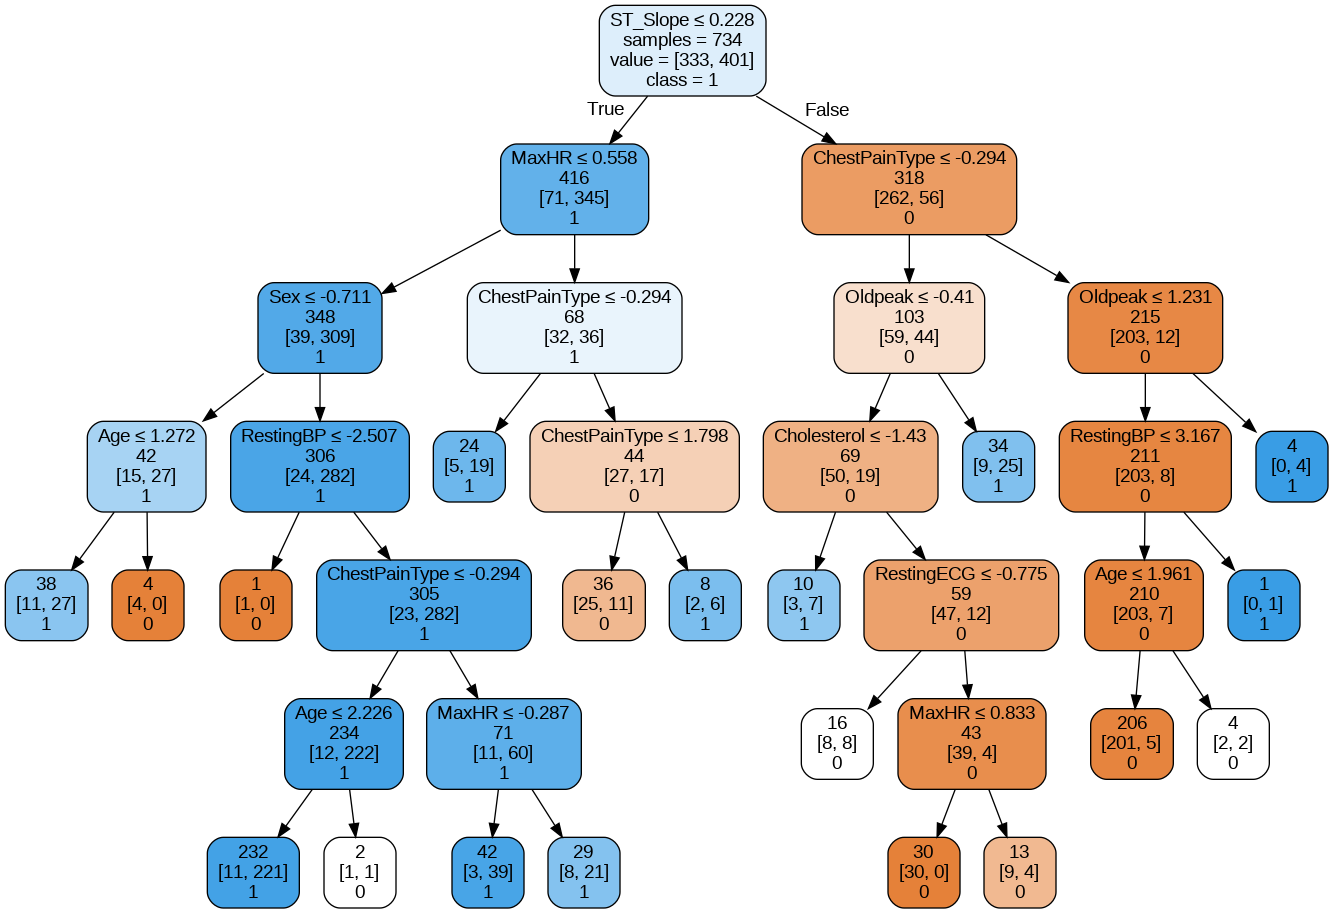

In [ ]:

DTpreds2 = gs.predict(valid_X)

DF2 = pd.DataFrame({'Actual': valid_y,
                    'Predicted': DTpreds2})

DF2.head(20)

classificationSummary(valid_y, DTpreds2)

print()

print(classification_report(valid_y, DTpreds2)) #to be referred

s_DT = DecisionTreeClassifier(max_depth = 6, min_samples_split = 40,
                              min_impurity_decrease = 0.001, random_state = 0)
s_DT.fit(train_X, train_y)

plotDecisionTree(s_DT, feature_names = train_X.columns,
                 class_names = s_DT.classes_)

## Bagging

In [ ]:
BG = BaggingClassifier(DecisionTreeClassifier(random_state = 0),
                       n_estimators = 100, random_state = 0)

In [ ]:
BG.fit(train_X, train_y)

pred1 = BG.predict(valid_X)
print(classification_report(valid_y, pred1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.87      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Boosting

In [ ]:
BT = AdaBoostClassifier(DecisionTreeClassifier(random_state=0),
                        n_estimators = 100, random_state=0)

In [ ]:
BT.fit(train_X,train_y)

pred4 = BT.predict(valid_X)
print(classification_report(valid_y,pred4))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        77
           1       0.83      0.76      0.79       107

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.77      0.77      0.77       184



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF.fit(train_X, train_y)

pred7 = RF.predict(valid_X)
print(classification_report(valid_y, pred7))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        77
           1       0.85      0.90      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [ ]:
imp = RF.feature_importances_
df1 = pd.DataFrame({"Features": train_X.columns, "Importance": imp})
df1 = df1.sort_values('Importance')
print(df1)

          Features  Importance
6       RestingECG    0.023210
5        FastingBS    0.023596
1              Sex    0.033525
3        RestingBP    0.068631
0              Age    0.076806
8   ExerciseAngina    0.077481
4      Cholesterol    0.099324
7            MaxHR    0.116584
2    ChestPainType    0.119049
9          Oldpeak    0.126829
10        ST_Slope    0.234964


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVM = SVC(random_state = 0)

In [ ]:
SVM.fit(train_X, train_y)

pred7 = SVM.predict(valid_X)

DF1 = pd.DataFrame({"Actual": valid_y, "Predict": pred7})
print(DF1.head(20))
print()
print(classification_report(valid_y, pred7))

     Actual  Predict
306       1        1
711       0        1
298       1        1
466       1        1
253       0        0
230       0        0
906       0        0
14        0        0
202       0        0
31        0        0
532       1        1
420       0        1
408       1        1
631       1        1
145       0        0
441       1        1
521       1        1
390       1        1
247       1        1
812       0        0

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
nb1 = GaussianNB()
nb1.fit(train_X, train_y)

pred8 = nb1.predict(valid_X)

DF2 = pd.DataFrame({"Actual": valid_y, "Predict": pred8})
print(DF2.head(20))
print()
print(classification_report(valid_y,pred8))

     Actual  Predict
306       1        1
711       0        0
298       1        1
466       1        1
253       0        0
230       0        0
906       0        0
14        0        0
202       0        0
31        0        0
532       1        1
420       0        1
408       1        1
631       1        1
145       0        0
441       1        1
521       1        1
390       1        1
247       1        1
812       0        0

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.86      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



## Neural Nets

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn = MLPClassifier(hidden_layer_sizes = (5,6,3),
                   activation = "relu",
                   solver = 'sgd',
                   learning_rate = "adaptive",
                   learning_rate_init= 0.05,
                   max_iter=200, warm_start = True)

In [ ]:
model = nn.fit(train_X, train_y)
predictions = model.predict(valid_X)
print(predictions)

[1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(classification_report(valid_y, predictions))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        77
           1       0.82      0.91      0.86       107

    accuracy                           0.83       184
   macro avg       0.84      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
#to test for overfitting, predict the training which we already
#learned from
train_pred = model.predict(train_X)
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       333
           1       0.90      0.97      0.94       401

    accuracy                           0.93       734
   macro avg       0.93      0.92      0.93       734
weighted avg       0.93      0.93      0.93       734



## Vizualising the metrics

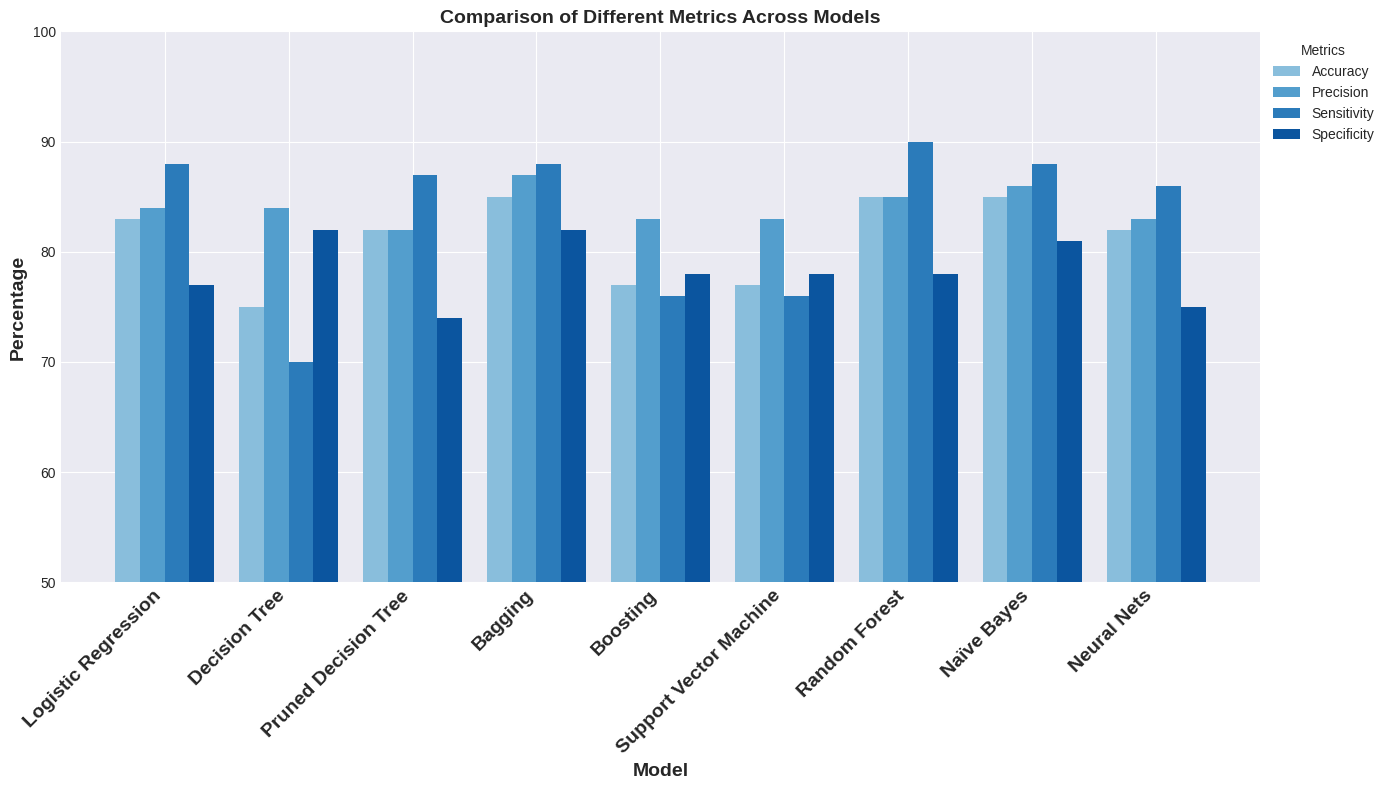

In [ ]:
data = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Pruned Decision Tree',
        'Bagging', 'Boosting', 'Support Vector Machine',
        'Random Forest', 'Naïve Bayes', 'Neural Nets'
    ],
    'Accuracy': [83, 75, 82, 85, 77, 77, 85, 85, 82],
    'Precision': [84, 84, 82, 87, 83, 83, 85, 86, 83],
    'Sensitivity': [88, 70, 87, 88, 76, 76, 90, 88, 86],
    'Specificity': [77, 82, 74, 82, 78, 78, 78, 81, 75]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Set the color palette to 'muted'
dark_blues = sns.color_palette("Blues")[-4:]  # Get the three darkest shades

# Set the palette
sns.set_palette(dark_blues)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Setting the positions and width for the bars
positions = np.arange(len(df['Model']))
bar_width = 0.2

# Plotting each metric in a bar chart
ax.bar(positions - bar_width*1.5, df['Accuracy'], bar_width, label='Accuracy')
ax.bar(positions - bar_width/2, df['Precision'], bar_width, label='Precision')
ax.bar(positions + bar_width/2, df['Sensitivity'], bar_width, label='Sensitivity')
ax.bar(positions + bar_width*1.5, df['Specificity'], bar_width, label='Specificity')

# Adding model names as x-ticks
ax.set_xticks(positions)
ax.set_xticklabels(df['Model'], rotation=45, ha="right", fontsize=14, fontweight='bold')

# Adding some labels and a title
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Different Metrics Across Models', fontsize=14, fontweight='bold')

# Setting the y-axis limits
ax.set_ylim(50, 100)

# Adding a legend and grid
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metrics')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
